# 🧹 Taller de Limpieza y Preprocesamiento de Datos en Python

**Curso:** Machine Learning  
**Duración estimada:** 2 horas  
**Archivos necesarios:**  
- `saberpro_2020.xlsx`  
- `programas_2020.xlsx`


## 🎯 Objetivos del Taller

1. **Familiarizarse con la carga, inspección y combinación de datasets en Python.**  
2. **Aplicar técnicas de limpieza y transformación de datos para preparar datasets para análisis posteriores.**  
3. **Conocer y aplicar métodos de imputación, estandarización y codificación de variables.**  
4. **Desarrollar buenas prácticas para la manipulación de datos usando Pandas.**


## 📝 Actividades del Taller

A partir de los archivos suministrados (`saberpro_2020.xlsx` y `programas_2020.xlsx`), realiza en este notebook de Python los siguientes pasos, documentando tu código con comentarios explicativos:

1. **Carga de Datos:**  
   Carga ambos archivos en un DataFrame de Pandas y realiza una inspección preliminar de los datos (`head()`, `info()`, `shape()`). ✅

2. **Unificación de Datos:**  
   Realiza una fusión (*merge*) del DataFrame `saberpro_2020` con `programas_2020` utilizando la columna `COD_SNIES` como clave, mediante una unión de tipo **left join**, de forma que se anexen los nombres de los programas y sus grupos de referencia. ✅

3. **Reorganización de la Estructura (Pivot):**  
   Convierte la columna `MODULO` en columnas individuales con los valores de `PUNTAJE_MODULO` como contenido, de modo que cada estudiante tenga una fila con todas sus calificaciones de módulos. ✅

4. **Análisis de Valores Faltantes:**  
   Identifica y reporta la cantidad y el porcentaje de valores faltantes por columna. Comenta brevemente los hallazgos. ✅

5. **Filtrado de Datos Faltantes:**  
   Elimina las filas en las que la columna `PUNTAJE_GLOBAL` no tenga información (nulos o vacíos). También considere filtrar las filas de acuerdo a los comentarios que se encuentran en la columna `NOVEDADES`. ✅

6. **Remoción de Valores Atípicos:**
   Después de imputar los valores faltantes en los puntajes de los módulos, identifica y elimina las observaciones que presentan valores atípicos extremos en al menos una de estas variables.
   Puedes utilizar un criterio basado en los rangos intercuartílicos (IQR) o z-scores, según tu preferencia.
   Justifica el criterio elegido y explica cuántos registros fueron eliminados en este proceso. ✅

7. **Imputación de Datos:**  
   Para las columnas de puntajes de cada módulo, reemplaza los valores faltantes utilizando medidas de tendencia central (elige entre **media** o **mediana**, justifica tu elección).✅

8. **Estandarización de Variables Numéricas:**  
   Estandariza las variables numéricas (por ejemplo: puntajes) utilizando uno de los siguientes métodos:
   - Normalización Min-Max.
   - Estandarización basada en la distribución normal estándar (*Z-score*).
   Explica cuál método usaste y por qué.✅

9. **Codificación de Variables Categóricas:**  
   Aplica codificación one-hot a la variable `GRUPO_REFERENCIA`, de forma que pueda ser utilizada posteriormente en modelos estadísticos o de machine learning.✅

10. **EDA:**
   Realice un análisis exploratorio básico, identifique algunos "insights" que le parezcan relevante frente a los datos.✅


## 🧠 Reflexión Final

Al finalizar el taller, reflexiona y responde brevemente:
- ¿Qué retos encontraste al trabajar con datos reales?
- ¿Qué técnicas crees que son más críticas antes de comenzar un análisis o modelado?


In [151]:
# Importación de librerías
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. **Carga de Datos**

In [152]:
# 1. Carga de Datos Desde Drive
df_saberpro = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/MATERIA MINERÍA DE DATOS/Taller 1/saberpro_2020.xlsx")
df_programas = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/MATERIA MINERÍA DE DATOS/Taller 1/programas_2020.xlsx")

# 2. Carga desde archivos locales (misma carpeta que el script)
# df_saberpro = pd.read_excel('saberpro_2020.xlsx')
# df_programas = pd.read_excel('programas_2020.xlsx')

In [153]:
# Inspección preliminar Saberpro 2020
print("***SABER PRO 2020***")
display(df_saberpro.head())
display(df_saberpro.info())
display(df_saberpro.shape)

# Inspección preliminar Programas
print("\n***PROGRAMAS 2020***")
display(df_programas.head())
display(df_programas.info())
print(df_programas.shape)

***SABER PRO 2020***


,TIPO_DOCUMENTO,NOMBRE,TIPO_EVALUADO,COD_SNIES,CIUDAD,PUNTAJE_GLOBAL,PERCENTIL_NACIONAL,PERCENTIL_GRUPO_REFERENCIA,MODULO,PUNTAJE_MODULO,NIVEL_DESEMPEÑO,PERCENTIL_MODULO,PERCENTIL_GRUPO,NOVEDADES
0,CC,Estudiante1,Estudiante,52722,PEREIRA,123,16,-,COMPETENCIAS CIUDADANAS,104,1,8,-,-
1,CC,Estudiante1,Estudiante,52722,PEREIRA,123,16,-,INGLÉS,134,A1,28,-,-
2,CC,Estudiante1,Estudiante,52722,PEREIRA,123,16,-,LECTURA CRÍTICA,98,1,4,-,-
3,CC,Estudiante1,Estudiante,52722,PEREIRA,123,16,-,COMUNICACIÓN ESCRITA,157,3,67,-,-
4,CC,Estudiante1,Estudiante,52722,PEREIRA,123,16,-,RAZONAMIENTO CUANTITATIVO,123,1,23,-,-


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   TIPO_DOCUMENTO              8954 non-null   object
 1   NOMBRE                      8954 non-null   object
 2   TIPO_EVALUADO               8954 non-null   object
 3   COD_SNIES                   8954 non-null   int64 
 4   CIUDAD                      8954 non-null   object
 5   PUNTAJE_GLOBAL              8954 non-null   object
 6   PERCENTIL_NACIONAL          8954 non-null   object
 7   PERCENTIL_GRUPO_REFERENCIA  8954 non-null   object
 8   MODULO                      8954 non-null   object
 9   PUNTAJE_MODULO              8773 non-null   object
 10  NIVEL_DESEMPEÑO             8773 non-null   object
 11  PERCENTIL_MODULO            8773 non-null   object
 12  PERCENTIL_GRUPO             8954 non-null   object
 13  NOVEDADES                   8954 non-null   obje

None

(8954, 14)


***PROGRAMAS 2020***


,COD_SNIES,PROGRAMA,GRUPO_REFERENCIA
0,52722,MEDICINA VETERINARIA Y ZOOTECNIA,CIENCIAS AGROPECUARIAS
1,4099,LICENCIATURA EN PEDAGOGIA INFANTIL,EDUCACIÓN
2,20484,LICENCIATURA EN BILINGÜISMO CON ÉNFASIS EN INGLÉS,EDUCACIÓN
3,19385,LICENCIATURA EN COMUNICACION E INFORMATICA EDU...,EDUCACIÓN
4,12019,ADMINISTRACION INDUSTRIAL,ADMINISTRACIÓN Y AFINES


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   COD_SNIES         27 non-null     int64 
 1   PROGRAMA          27 non-null     object
 2   GRUPO_REFERENCIA  27 non-null     object
dtypes: int64(1), object(2)
memory usage: 780.0+ bytes


None

(27, 3)


# 2. **Unificación de Datos**

In [154]:
# 2. Unificación de Datos
df_merged = pd.merge(df_saberpro, df_programas, on='COD_SNIES', how='left')
print("DATAFRAME UNIFICADO")
display(df_merged.head())

DATAFRAME UNIFICADO


,TIPO_DOCUMENTO,NOMBRE,TIPO_EVALUADO,COD_SNIES,CIUDAD,PUNTAJE_GLOBAL,PERCENTIL_NACIONAL,PERCENTIL_GRUPO_REFERENCIA,MODULO,PUNTAJE_MODULO,NIVEL_DESEMPEÑO,PERCENTIL_MODULO,PERCENTIL_GRUPO,NOVEDADES,PROGRAMA,GRUPO_REFERENCIA
0,CC,Estudiante1,Estudiante,52722,PEREIRA,123,16,-,COMPETENCIAS CIUDADANAS,104,1,8,-,-,MEDICINA VETERINARIA Y ZOOTECNIA,CIENCIAS AGROPECUARIAS
1,CC,Estudiante1,Estudiante,52722,PEREIRA,123,16,-,INGLÉS,134,A1,28,-,-,MEDICINA VETERINARIA Y ZOOTECNIA,CIENCIAS AGROPECUARIAS
2,CC,Estudiante1,Estudiante,52722,PEREIRA,123,16,-,LECTURA CRÍTICA,98,1,4,-,-,MEDICINA VETERINARIA Y ZOOTECNIA,CIENCIAS AGROPECUARIAS
3,CC,Estudiante1,Estudiante,52722,PEREIRA,123,16,-,COMUNICACIÓN ESCRITA,157,3,67,-,-,MEDICINA VETERINARIA Y ZOOTECNIA,CIENCIAS AGROPECUARIAS
4,CC,Estudiante1,Estudiante,52722,PEREIRA,123,16,-,RAZONAMIENTO CUANTITATIVO,123,1,23,-,-,MEDICINA VETERINARIA Y ZOOTECNIA,CIENCIAS AGROPECUARIAS


In [155]:
df_merged['MODULO'].unique()

array(['COMPETENCIAS CIUDADANAS', 'INGLÉS', 'LECTURA CRÍTICA',
       'COMUNICACIÓN ESCRITA', 'RAZONAMIENTO CUANTITATIVO'], dtype=object)

In [156]:
df_merged['NOMBRE'].unique()

array(['Estudiante1', 'Estudiante2', 'Estudiante3', ..., 'Estudiante1789',
       'Estudiante1790', 'Estudiante1791'], dtype=object)

# 3. **Reorganización de la Estructura (Pivot)**



In [157]:
# La tabla pivote es tomar los registros y volverlos columnas pivot table
pivoted_df = df_merged.pivot_table(
    index=['TIPO_DOCUMENTO', 'NOMBRE', 'COD_SNIES', 'CIUDAD', 'PUNTAJE_GLOBAL', 'GRUPO_REFERENCIA','NOVEDADES'],
    columns='MODULO',
    values='PUNTAJE_MODULO',
    aggfunc='first'
).reset_index()
pivoted_df.columns.name = None
pivoted_df.head()

,TIPO_DOCUMENTO,NOMBRE,COD_SNIES,CIUDAD,PUNTAJE_GLOBAL,GRUPO_REFERENCIA,NOVEDADES,COMPETENCIAS CIUDADANAS,COMUNICACIÓN ESCRITA,INGLÉS,LECTURA CRÍTICA,RAZONAMIENTO CUANTITATIVO
0,CC,Estudiante1,52722,PEREIRA,123,CIENCIAS AGROPECUARIAS,-,104,157,134,98,123
1,CC,Estudiante10,16249,PEREIRA,154,EDUCACIÓN,-,158,212,111,158,130
2,CC,Estudiante100,270,PEREIRA,143,INGENIERÍA,-,153,129,179,107,149
3,CC,Estudiante1000,52680,PEREIRA,138,INGENIERÍA,-,154,105,132,147,151
4,CC,Estudiante1001,19518,PEREIRA,158,INGENIERÍA,-,140,131,163,157,199


# 4. **Análisis de Valores Faltantes**

In [158]:
#Cambiar registros erróneos, se verificó y solo Competencias Ciudadanas tenía un registro (-)
columns_to_replace = ['PUNTAJE_GLOBAL', 'COMPETENCIAS CIUDADANAS', 'COMUNICACIÓN ESCRITA', 'INGLÉS', 'LECTURA CRÍTICA', 'RAZONAMIENTO CUANTITATIVO']
pivoted_df[columns_to_replace] = pivoted_df[columns_to_replace].replace('-', 0)
pivoted_df['COMPETENCIAS CIUDADANAS'] = pd.to_numeric(pivoted_df['COMPETENCIAS CIUDADANAS'], errors='coerce')
pivoted_df['COMUNICACIÓN ESCRITA'] = pd.to_numeric(pivoted_df['COMUNICACIÓN ESCRITA'], errors='coerce')
pivoted_df['INGLÉS'] = pd.to_numeric(pivoted_df['INGLÉS'], errors='coerce')
pivoted_df['LECTURA CRÍTICA'] = pd.to_numeric(pivoted_df['LECTURA CRÍTICA'], errors='coerce')
pivoted_df['RAZONAMIENTO CUANTITATIVO'] = pd.to_numeric(pivoted_df['RAZONAMIENTO CUANTITATIVO'], errors='coerce')
pivoted_df['PUNTAJE_GLOBAL'] = pd.to_numeric(pivoted_df['PUNTAJE_GLOBAL'], errors='coerce')

/tmp/ipython-input-158-684581148.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivoted_df[columns_to_replace] = pivoted_df[columns_to_replace].replace('-', 0)


In [159]:
#VALORES NULOS SIN IMPUTACIÓN
print("Valores nulos por columna")
missing_values_count = pivoted_df.isnull().sum()
display(missing_values_count)

print("\n % Valores nulos por columna")
# Calcula el porcentaje de valores nulos por columna
missing_values_percent = round((pivoted_df.isnull().sum() / len(pivoted_df)) * 100, 1)
display(missing_values_percent)

Valores nulos por columna


,0
TIPO_DOCUMENTO,0
NOMBRE,0
COD_SNIES,0
CIUDAD,0
PUNTAJE_GLOBAL,0
GRUPO_REFERENCIA,0
NOVEDADES,0
COMPETENCIAS CIUDADANAS,33
COMUNICACIÓN ESCRITA,35
INGLÉS,38



 % Valores nulos por columna


,0
TIPO_DOCUMENTO,0.0
NOMBRE,0.0
COD_SNIES,0.0
CIUDAD,0.0
PUNTAJE_GLOBAL,0.0
GRUPO_REFERENCIA,0.0
NOVEDADES,0.0
COMPETENCIAS CIUDADANAS,1.8
COMUNICACIÓN ESCRITA,2.0
INGLÉS,2.1


# 5. **Filtrado de Datos Faltantes**  

In [160]:
# Filtrar filas donde 'NOVEDADES' no es nulo - PUNTAJE GLOBAL NO TIENE VALLORES NULOS
df_novedades = pivoted_df[pivoted_df['NOVEDADES'].notna()].copy()
print("DataFrame con Novedades:")
display(df_novedades.head())
print(f"\n Número de filas con Novedades: {len(df_novedades)}")

DataFrame con Novedades:


,TIPO_DOCUMENTO,NOMBRE,COD_SNIES,CIUDAD,PUNTAJE_GLOBAL,GRUPO_REFERENCIA,NOVEDADES,COMPETENCIAS CIUDADANAS,COMUNICACIÓN ESCRITA,INGLÉS,LECTURA CRÍTICA,RAZONAMIENTO CUANTITATIVO
0,CC,Estudiante1,52722,PEREIRA,123,CIENCIAS AGROPECUARIAS,-,104.0,157.0,134.0,98.0,123.0
1,CC,Estudiante10,16249,PEREIRA,154,EDUCACIÓN,-,158.0,212.0,111.0,158.0,130.0
2,CC,Estudiante100,270,PEREIRA,143,INGENIERÍA,-,153.0,129.0,179.0,107.0,149.0
3,CC,Estudiante1000,52680,PEREIRA,138,INGENIERÍA,-,154.0,105.0,132.0,147.0,151.0
4,CC,Estudiante1001,19518,PEREIRA,158,INGENIERÍA,-,140.0,131.0,163.0,157.0,199.0



 Número de filas con Novedades: 1791


# 6. **Remoción de Valores Atípicos**

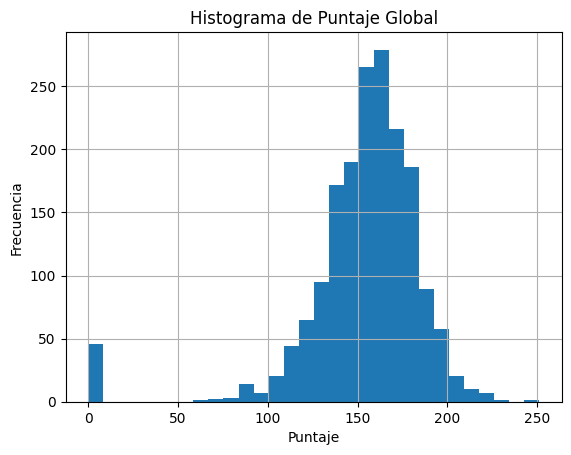

In [161]:
# Inicialmente se verifica si los datos tienen  una distribución normal
import matplotlib.pyplot as plt

pivoted_df['PUNTAJE_GLOBAL'].hist(bins=30)
plt.title("Histograma de Puntaje Global")
plt.xlabel("Puntaje")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

El histograma del `PUNTAJE_GLOBAL` muestra una distribución aproximadamente normal, centrada entre 150 y 180 puntos. La mayoría de los estudiantes se concentran en ese rango. Sin embargo, se observa un grupo atípico con puntajes cercanos a 0, lo cual podría corresponder a registros erróneos o estudiantes que no presentaron adecuadamente la prueba.

In [162]:
# Eliminar valores 0 y nulos en PUNTAJE_GLOBAL
pivoted_df = pivoted_df[pivoted_df['PUNTAJE_GLOBAL'] > 0].dropna(subset=['PUNTAJE_GLOBAL'])

# Columnas de puntaje
score_columns = ['COMPETENCIAS CIUDADANAS', 'COMUNICACIÓN ESCRITA', 'INGLÉS', 'LECTURA CRÍTICA', 'RAZONAMIENTO CUANTITATIVO', 'PUNTAJE_GLOBAL']

# Calcular IQR
Q1 = pivoted_df[score_columns].quantile(0.25)
Q3 = pivoted_df[score_columns].quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers
mask = ~((pivoted_df[score_columns] < (Q1 - 1.5 * IQR)) | #Esta es la negación para convertir los true en false
         (pivoted_df[score_columns] > (Q3 + 1.5 * IQR))).any(axis=1) #Axis 1 significa que analiza fila por fila

# Resultado limpio
pivoted_df_iqr = pivoted_df[mask].copy() #Acá toma solo los valores que no son outliners, o sea, lo que salieron true del Mask

# Info rápida
print(f"Filas originales: {len(pivoted_df)}")
print(f"Filas después de eliminar outliers: {len(pivoted_df_iqr)}")
print(f"Filas eliminadas: {len(pivoted_df) - len(pivoted_df_iqr)}")

display(pivoted_df_iqr.head())

Filas originales: 1745
Filas después de eliminar outliers: 1613
Filas eliminadas: 132


,TIPO_DOCUMENTO,NOMBRE,COD_SNIES,CIUDAD,PUNTAJE_GLOBAL,GRUPO_REFERENCIA,NOVEDADES,COMPETENCIAS CIUDADANAS,COMUNICACIÓN ESCRITA,INGLÉS,LECTURA CRÍTICA,RAZONAMIENTO CUANTITATIVO
0,CC,Estudiante1,52722,PEREIRA,123,CIENCIAS AGROPECUARIAS,-,104.0,157.0,134.0,98.0,123.0
1,CC,Estudiante10,16249,PEREIRA,154,EDUCACIÓN,-,158.0,212.0,111.0,158.0,130.0
2,CC,Estudiante100,270,PEREIRA,143,INGENIERÍA,-,153.0,129.0,179.0,107.0,149.0
3,CC,Estudiante1000,52680,PEREIRA,138,INGENIERÍA,-,154.0,105.0,132.0,147.0,151.0
4,CC,Estudiante1001,19518,PEREIRA,158,INGENIERÍA,-,140.0,131.0,163.0,157.0,199.0


Se eliminaron los valores atípicos utilizando el método del rango intercuartílico (IQR), ya que los datos no presentan una distribución perfectamente normal. El IQR es una técnica robusta que no se ve afectada por la asimetría o valores extremos, lo cual lo hace más adecuado para este conjunto de datos.

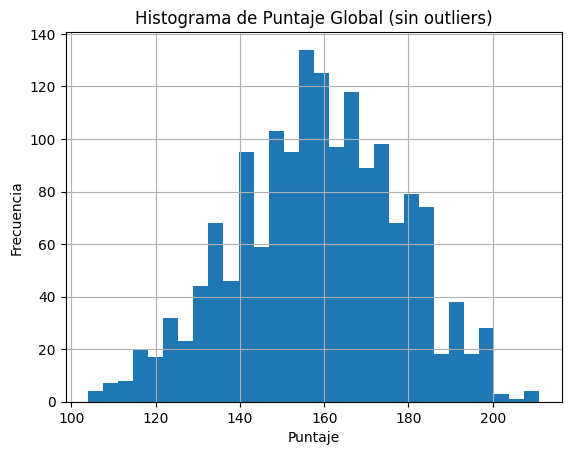

In [163]:
# Graficar histograma del 'PUNTAJE_GLOBAL' después de eliminar outliers
pivoted_df_iqr['PUNTAJE_GLOBAL'].hist(bins=30)
plt.title("Histograma de Puntaje Global (sin outliers)")
plt.xlabel("Puntaje")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [164]:
#IMPUTACIÓN DE DATOS
# Crear una copia del DataFrame original
pivoted_df_imputed = pivoted_df_iqr.copy()

# Columnas a imputar con la media
columns_to_impute = ['COMPETENCIAS CIUDADANAS', 'COMUNICACIÓN ESCRITA', 'INGLÉS', 'LECTURA CRÍTICA', 'RAZONAMIENTO CUANTITATIVO', 'PUNTAJE_GLOBAL']

# Imputar valores nulos con la media de cada columna
promedio = pivoted_df_imputed[columns_to_impute].mean()
pivoted_df_imputed[columns_to_impute] = pivoted_df_imputed[columns_to_impute].fillna(promedio)

# Mostrar el DataFrame después de la imputación
print("DataFrame después de la imputación con la media:")
display(pivoted_df_imputed.head())
print(f"Número de filas después de imputar: {len(pivoted_df_imputed)}")

DataFrame después de la imputación con la media:


,TIPO_DOCUMENTO,NOMBRE,COD_SNIES,CIUDAD,PUNTAJE_GLOBAL,GRUPO_REFERENCIA,NOVEDADES,COMPETENCIAS CIUDADANAS,COMUNICACIÓN ESCRITA,INGLÉS,LECTURA CRÍTICA,RAZONAMIENTO CUANTITATIVO
0,CC,Estudiante1,52722,PEREIRA,123,CIENCIAS AGROPECUARIAS,-,104.0,157.0,134.0,98.0,123.0
1,CC,Estudiante10,16249,PEREIRA,154,EDUCACIÓN,-,158.0,212.0,111.0,158.0,130.0
2,CC,Estudiante100,270,PEREIRA,143,INGENIERÍA,-,153.0,129.0,179.0,107.0,149.0
3,CC,Estudiante1000,52680,PEREIRA,138,INGENIERÍA,-,154.0,105.0,132.0,147.0,151.0
4,CC,Estudiante1001,19518,PEREIRA,158,INGENIERÍA,-,140.0,131.0,163.0,157.0,199.0


Número de filas después de imputar: 1613


Se realizó la imputación de datos usando el promedio porque es una técnica sencilla y efectiva cuando los datos no presentan una distribución altamente sesgada. Al haber eliminado previamente los valores atípicos, la media se vuelve una medida representativa y confiable para completar los valores faltantes sin distorsionar la distribución general.

In [165]:
#VALORES NULOS CON IMPUTACIÓN
print("Valores nulos por columna")
missing_values_count = pivoted_df_imputed.isnull().sum()
display(missing_values_count)

print("\n % Valores nulos por columna")
# Calcula el porcentaje de valores nulos por columna
missing_values_percent = round((pivoted_df_imputed.isnull().sum() / len(pivoted_df)) * 100, 1)
display(missing_values_percent)

Valores nulos por columna


,0
TIPO_DOCUMENTO,0
NOMBRE,0
COD_SNIES,0
CIUDAD,0
PUNTAJE_GLOBAL,0
GRUPO_REFERENCIA,0
NOVEDADES,0
COMPETENCIAS CIUDADANAS,0
COMUNICACIÓN ESCRITA,0
INGLÉS,0



 % Valores nulos por columna


,0
TIPO_DOCUMENTO,0.0
NOMBRE,0.0
COD_SNIES,0.0
CIUDAD,0.0
PUNTAJE_GLOBAL,0.0
GRUPO_REFERENCIA,0.0
NOVEDADES,0.0
COMPETENCIAS CIUDADANAS,0.0
COMUNICACIÓN ESCRITA,0.0
INGLÉS,0.0


# 8. **Estandarización de Variables Numéricas**  

### Se utilizó la estandarización con el método Z-score porque los puntajes, tras eliminar valores atípicos, presentaban una distribución aproximadamente normal. Este método conserva la relación entre los valores originales y su distancia respecto a la media.

In [166]:
columns_to_impute = ['COMPETENCIAS CIUDADANAS', 'COMUNICACIÓN ESCRITA', 'INGLÉS', 'LECTURA CRÍTICA', 'RAZONAMIENTO CUANTITATIVO', 'PUNTAJE_GLOBAL']

In [167]:
from sklearn.preprocessing import StandardScaler

# Copia del DataFrame
df_zscore = pivoted_df_imputed.copy()

# Estandarizar con Z-score
scaler_z = StandardScaler()
df_zscore[columns_to_impute] = scaler_z.fit_transform(df_zscore[columns_to_impute])

display(df_zscore.head())

,TIPO_DOCUMENTO,NOMBRE,COD_SNIES,CIUDAD,PUNTAJE_GLOBAL,GRUPO_REFERENCIA,NOVEDADES,COMPETENCIAS CIUDADANAS,COMUNICACIÓN ESCRITA,INGLÉS,LECTURA CRÍTICA,RAZONAMIENTO CUANTITATIVO
0,CC,Estudiante1,52722,PEREIRA,-1.836679,CIENCIAS AGROPECUARIAS,-,-2.185144,0.432717,-1.265663,-2.427138,-1.258536
1,CC,Estudiante10,16249,PEREIRA,-0.242161,EDUCACIÓN,-,-0.128139,2.446936,-2.172185,-0.107476,-1.020258
2,CC,Estudiante100,270,PEREIRA,-0.807958,INGENIERÍA,-,-0.318602,-0.592704,0.507967,-2.079188,-0.373505
3,CC,Estudiante1000,52680,PEREIRA,-1.065138,INGENIERÍA,-,-0.280509,-1.471636,-1.344491,-0.532747,-0.305426
4,CC,Estudiante1001,19518,PEREIRA,-0.036417,INGENIERÍA,-,-0.813807,-0.519460,-0.122657,-0.146137,1.328478


# 9. **Codificación de Variables Categóricas**  

In [169]:
#Codificar las variables con 0 y 1 para machine learning
df_encoded = pd.get_dummies(df_zscore, columns=['GRUPO_REFERENCIA'], prefix='GRUPO', drop_first=False)
display(df_encoded.head())

,TIPO_DOCUMENTO,NOMBRE,COD_SNIES,CIUDAD,PUNTAJE_GLOBAL,NOVEDADES,COMPETENCIAS CIUDADANAS,COMUNICACIÓN ESCRITA,INGLÉS,LECTURA CRÍTICA,RAZONAMIENTO CUANTITATIVO,GRUPO_ADMINISTRACIÓN Y AFINES,GRUPO_CIENCIAS AGROPECUARIAS,GRUPO_CIENCIAS NATURALES Y EXACTAS,GRUPO_EDUCACIÓN,GRUPO_INGENIERÍA,GRUPO_MEDICINA,GRUPO_RECREACIÓN Y DEPORTES
0,CC,Estudiante1,52722,PEREIRA,-1.836679,-,-2.185144,0.432717,-1.265663,-2.427138,-1.258536,False,True,False,False,False,False,False
1,CC,Estudiante10,16249,PEREIRA,-0.242161,-,-0.128139,2.446936,-2.172185,-0.107476,-1.020258,False,False,False,True,False,False,False
2,CC,Estudiante100,270,PEREIRA,-0.807958,-,-0.318602,-0.592704,0.507967,-2.079188,-0.373505,False,False,False,False,True,False,False
3,CC,Estudiante1000,52680,PEREIRA,-1.065138,-,-0.280509,-1.471636,-1.344491,-0.532747,-0.305426,False,False,False,False,True,False,False
4,CC,Estudiante1001,19518,PEREIRA,-0.036417,-,-0.813807,-0.519460,-0.122657,-0.146137,1.328478,False,False,False,False,True,False,False


# 10. **EDA**

### **• Revisión General del DataFrame**


In [170]:
# Dimensiones del dataset
print("Dimensiones:", df_encoded.shape)

# Tipos de datos y nulos
print("\nInfo:")
df_encoded.info()

# Estadísticas básicas
print("\nEstadísticas:")
df_encoded.describe()

Dimensiones: (1613, 18)

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1613 entries, 0 to 1790
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   TIPO_DOCUMENTO                      1613 non-null   object 
 1   NOMBRE                              1613 non-null   object 
 2   COD_SNIES                           1613 non-null   int64  
 3   CIUDAD                              1613 non-null   object 
 4   PUNTAJE_GLOBAL                      1613 non-null   float64
 5   NOVEDADES                           1613 non-null   object 
 6   COMPETENCIAS CIUDADANAS             1613 non-null   float64
 7   COMUNICACIÓN ESCRITA                1613 non-null   float64
 8   INGLÉS                              1613 non-null   float64
 9   LECTURA CRÍTICA                     1613 non-null   float64
 10  RAZONAMIENTO CUANTITATIVO           1613 non-null   float64
 11  GRUPO_ADMINISTRAC

,COD_SNIES,PUNTAJE_GLOBAL,COMPETENCIAS CIUDADANAS,COMUNICACIÓN ESCRITA,INGLÉS,LECTURA CRÍTICA,RAZONAMIENTO CUANTITATIVO
count,1613.000000,1.613000e+03,1.613000e+03,1.613000e+03,1.613000e+03,1.613000e+03,1.613000e+03
mean,10295.510849,5.858784e-16,2.940405e-16,-3.964591e-16,4.008642e-16,-4.140795e-16,1.321530e-16
std,15854.676486,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00
min,263.000000,-2.813965e+00,-2.908905e+00,-2.863278e+00,-2.802809e+00,-2.968392e+00,-2.892439e+00
25%,271.000000,-6.536495e-01,-5.852510e-01,-6.293261e-01,-6.744533e-01,-6.487301e-01,-7.139016e-01
50%,3098.000000,1.501946e-02,6.232475e-02,-2.264823e-01,0.000000e+00,4.716841e-02,9.311101e-04
75%,16249.000000,7.351245e-01,7.099005e-01,7.989385e-01,6.656226e-01,7.044059e-01,6.817242e-01
max,106062.000000,2.689695e+00,2.462164e+00,2.666669e+00,2.399839e+00,2.869424e+00,2.553905e+00


El DataFrame `df_encoded` contiene 1613 filas y 18 columnas, con todas las variables ya codificadas numéricamente. Las variables ya se encuentran en la misma escala, ya que se  realizó estandarización de variables.

### **• Detección de Valores Nulos**

In [171]:
#Verificación de valores nulos
df_encoded.isnull().sum().sort_values(ascending=False)

,0
TIPO_DOCUMENTO,0
NOMBRE,0
COD_SNIES,0
CIUDAD,0
PUNTAJE_GLOBAL,0
NOVEDADES,0
COMPETENCIAS CIUDADANAS,0
COMUNICACIÓN ESCRITA,0
INGLÉS,0
LECTURA CRÍTICA,0


### **• Análisis de Variables Numéricas**

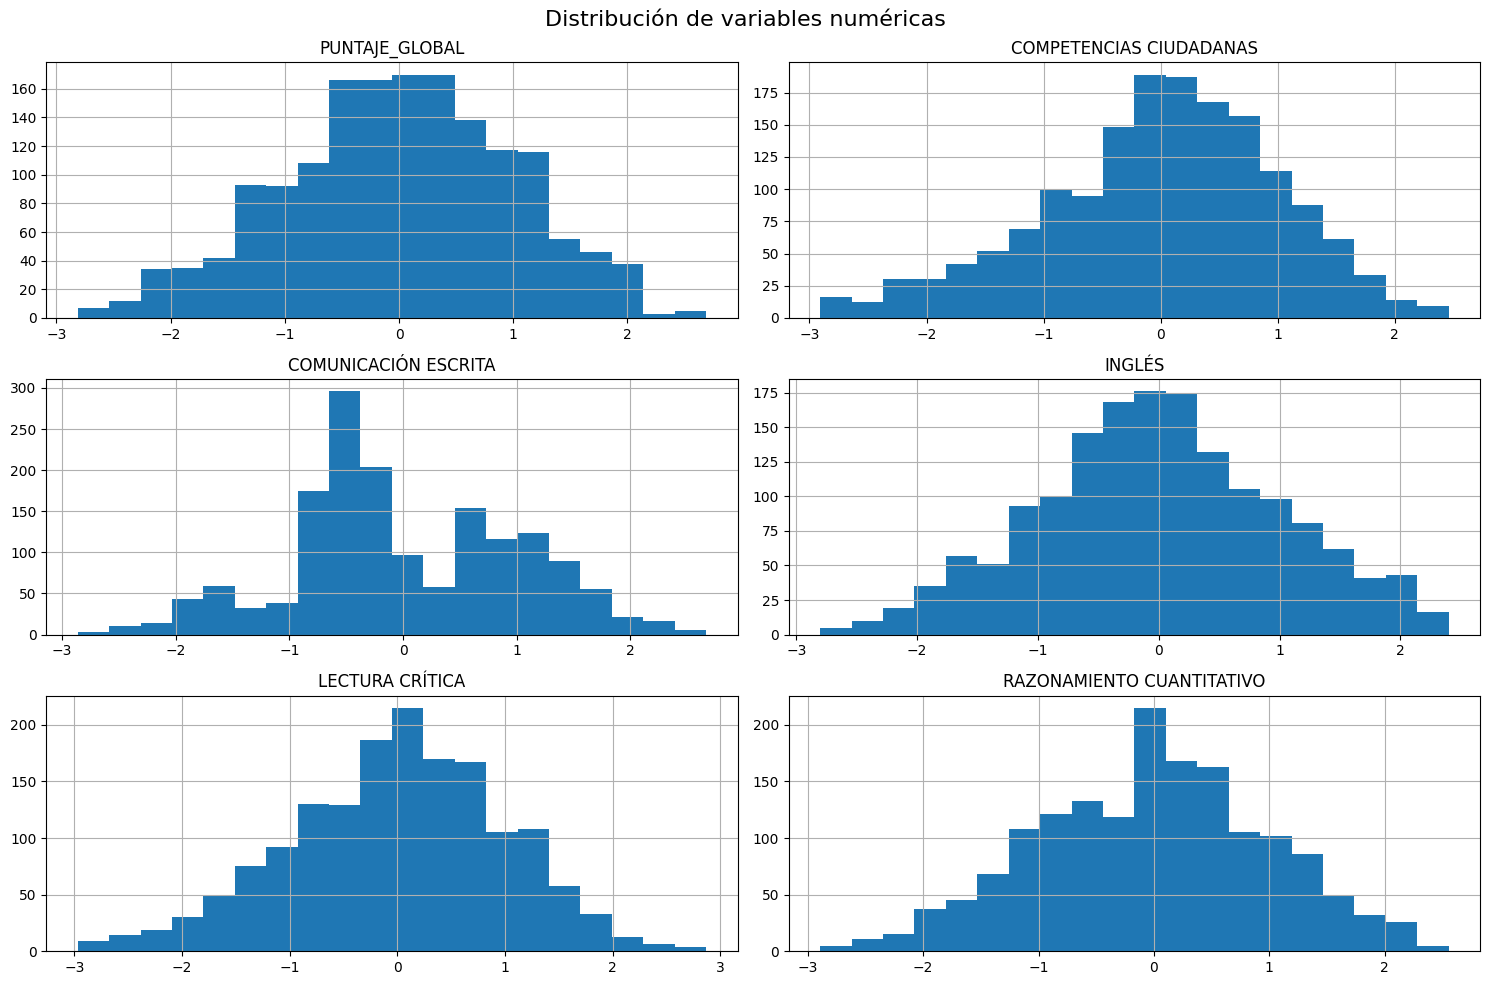

In [172]:
# Excluir variables no numéricas reales (como identificadores)
num_cols = df_encoded.select_dtypes(include='number').columns.drop('COD_SNIES')

# Histograma solo de las variables relevantes
df_encoded[num_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

Las competencias evaluadas (`PUNTAJE_GLOBAL`, `COMPETENCIAS CIUDADANAS`, `INGLÉS`, `LECTURA CRÍTICA`, `RAZONAMIENTO CUANTITATIVO`) muestran una distribución aproximadamente normal, lo cual sugiere que el desempeño de los estudiantes está centrado alrededor de la media, con pocos casos extremos.

Sin embargo, la variable `COMUNICACIÓN ESCRITA` presenta una asimetría visible: tiene una acumulación de casos entre -1 y 0, y un segundo pico positivo, indicando una posible distribución bimodal. Esto sugiere que podría haber dos perfiles de estudiantes con diferencias claras en esta competencia.

### **• Boxplot Por Grupo de Referencia**

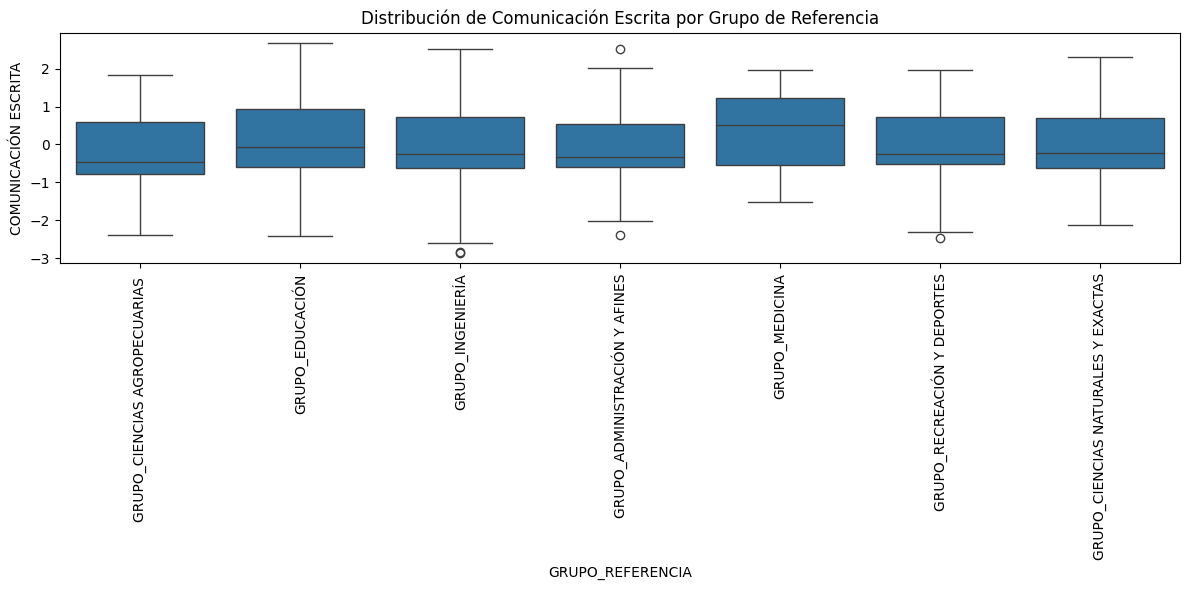

In [173]:
grupo_cols = [
    'GRUPO_ADMINISTRACIÓN Y AFINES',
    'GRUPO_CIENCIAS AGROPECUARIAS ',
    'GRUPO_CIENCIAS NATURALES Y EXACTAS',
    'GRUPO_EDUCACIÓN',
    'GRUPO_INGENIERÍA',
    'GRUPO_MEDICINA',
    'GRUPO_RECREACIÓN Y DEPORTES'
]

df_encoded['GRUPO_REFERENCIA'] = df_encoded[grupo_cols].idxmax(axis=1)  #Se volvió a crear la variable Grupo_Referencia para hacer un bolxplor

plt.figure(figsize=(12, 6))
sns.boxplot(x='GRUPO_REFERENCIA', y='COMUNICACIÓN ESCRITA', data=df_encoded)
plt.xticks(rotation=90)
plt.title('Distribución de Comunicación Escrita por Grupo de Referencia')
plt.tight_layout()
plt.show()


Existen diferencias claras en el desempeño de Comunicación Escrita según el grupo de referencia. Esto podría tener implicaciones curriculares o de intervención: algunos grupos muestran fortalezas claras (como Medicina), mientras que otros podrían requerir apoyo adicional (como Ingeniería o Exactas).

### **• Correlación entre variables**

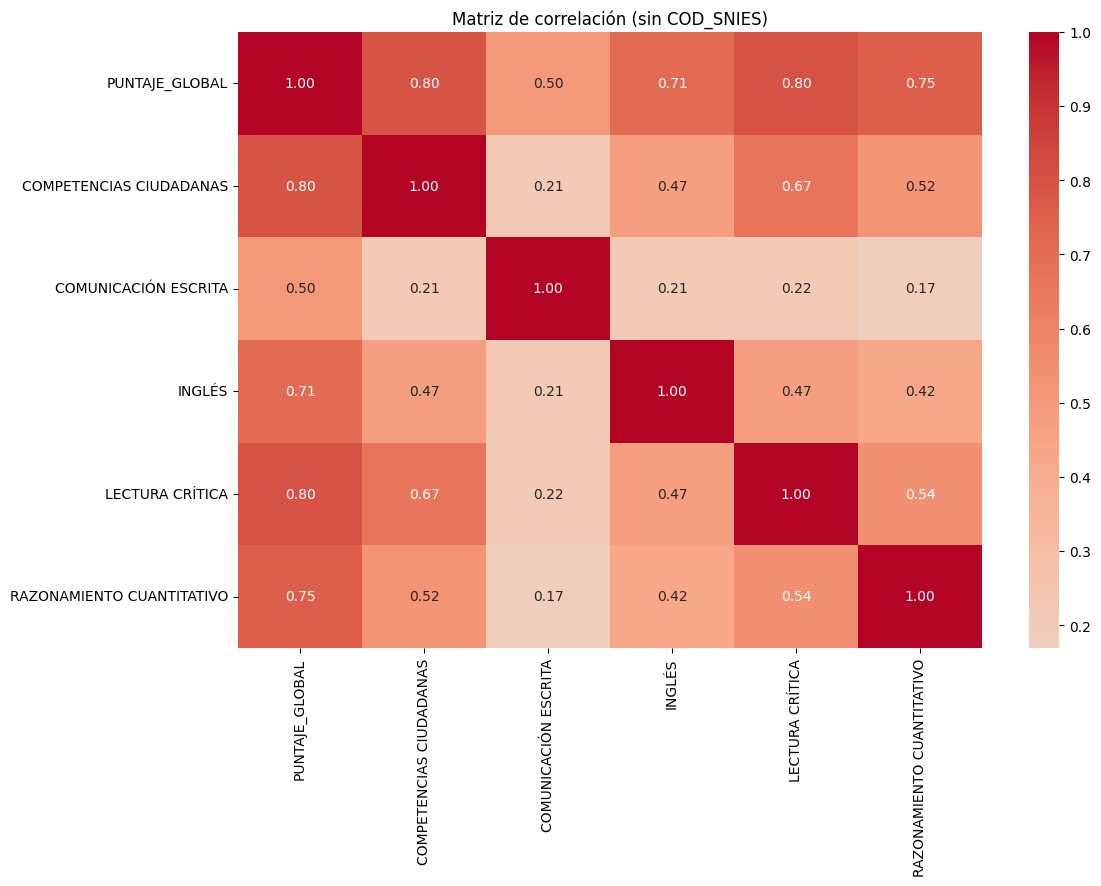

In [174]:
# Seleccionar solo variables numéricas, excluyendo 'COD_SNIES'
num_cols = df_encoded.select_dtypes(include='number').drop(columns='COD_SNIES')

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(num_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación (sin COD_SNIES)")
plt.show()

El `PUNTAJE_GLOBAL` tiene una alta correlación con `COMPETENCIAS CIUDADANAS`, `LECTURA CRÍTICA` y `RAZONAMIENTO CUANTITATIVO` (todas ≥ 0.75), lo que sugiere que estas tres áreas son las principales determinantes del rendimiento global.